# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 10
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.442s 


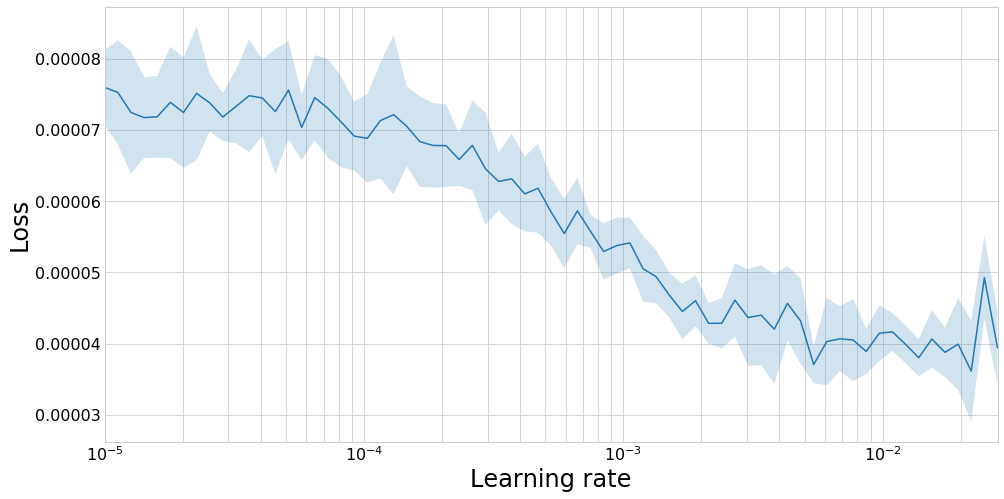

______________________________________



In [5]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [6]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'LinearCLR':{'reverse':False, 'max_lr':2e-3, 'min_lr':2e-4, 'scale':2}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using linear LR cycle
2 classes found, running in binary mode

1 New best found: 3.800002906458247e-05
2 New best found: 3.509259607251667e-05
3 New best found: 3.432329393182128e-05
Saving snapshot 1
4 New best found: 3.374888471811701e-05
7 New best found: 3.3473925420356546e-05
Saving snapshot 2
8 New best found: 3.302396836333124e-05
Saving snapshot 3
12 New best found: 3.278271833614778e-05
Saving snapshot 4
16 New best found: 3.266268718530889e-05
Saving snapshot 5
20 New best found: 3.225887533001131e-05
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.222465960136866e-05
Saving snapshot 8
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.219089256798784e-05
Saving snapshot 11
44 New best found: 3.207985109332665e-05
Saving snapshot 12
Saving snapshot 13
52 New best found: 3.2077701975830916e-05
Saving snapshot 14
56 New best found: 3.2006109536059976e-05
Saving snapshot 15
60 New best found: 3.199664026501427e-05
Savi

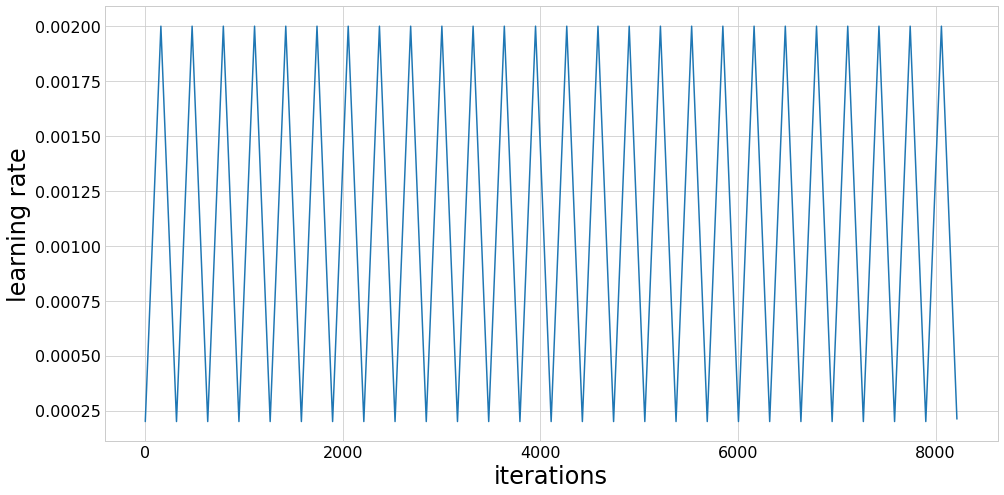

Fold took 88.010s

Training model 2 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107134). Check your callbacks.
  % delta_t_median)


1 New best found: 3.897435622103102e-05
2 New best found: 3.6324398834999965e-05
3 New best found: 3.5446255982851004e-05
Saving snapshot 1
4 New best found: 3.413553936268501e-05
7 New best found: 3.379195610865887e-05
Saving snapshot 2
8 New best found: 3.321234780148218e-05
Saving snapshot 3
12 New best found: 3.3011982471972083e-05
13 New best found: 3.2937476882815544e-05
Saving snapshot 4
Saving snapshot 5
20 New best found: 3.283199859451007e-05
21 New best found: 3.272274124635746e-05
Saving snapshot 6
24 New best found: 3.271072339936242e-05
Saving snapshot 7
Saving snapshot 8
32 New best found: 3.261284417706577e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.2558042092484435e-05
Saving snapshot 11
44 New best found: 3.2458384704505014e-05
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving snapshot 17
Saving snapshot 18
Saving snapshot 19
Saving snapshot 20
Saving snapshot 21
Early stopping after 84 epochs
Score

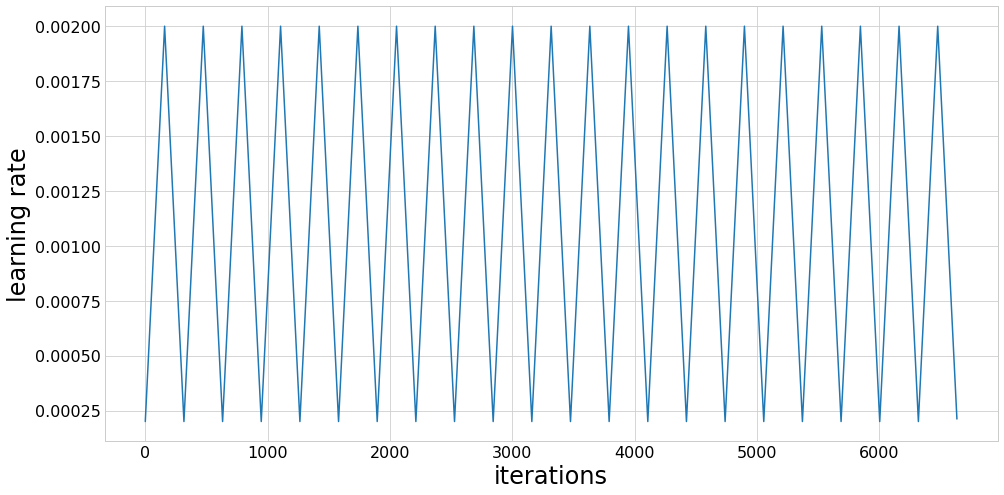

Fold took 74.731s

Training model 3 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118420). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7664618611694066e-05
2 New best found: 3.441992582769102e-05
Saving snapshot 1
4 New best found: 3.3149199841167354e-05
7 New best found: 3.295682789519039e-05
Saving snapshot 2
8 New best found: 3.258566761707897e-05
9 New best found: 3.256439287554795e-05
Saving snapshot 3
12 New best found: 3.223010285695889e-05
Saving snapshot 4
16 New best found: 3.203893632749139e-05
Saving snapshot 5
20 New best found: 3.202063134942807e-05
Saving snapshot 6
24 New best found: 3.178427065182232e-05
25 New best found: 3.1719170120339676e-05
Saving snapshot 7
Saving snapshot 8
32 New best found: 3.1683955227126085e-05
Saving snapshot 9
Saving snapshot 10
Saving snapshot 11
44 New best found: 3.1607429169248266e-05
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
Saving snapshot 15
60 New best found: 3.156236784290938e-05
Saving snapshot 16
Saving snapshot 17
Saving snapshot 18
Saving snapshot 19
Saving snapshot 20
Saving snapshot 21
85 New best found: 3.156020650094537e

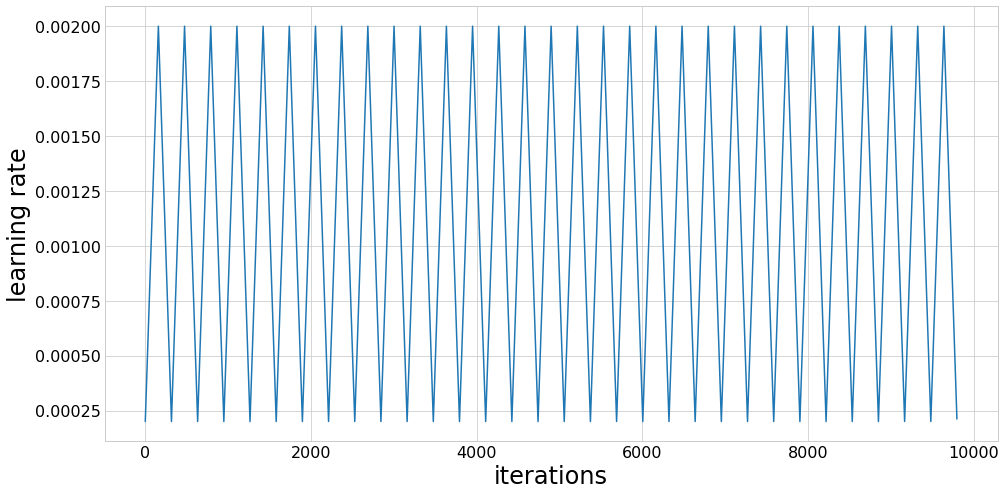

Fold took 109.795s

Training model 4 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133384). Check your callbacks.
  % delta_t_median)


1 New best found: 3.770107530102328e-05
2 New best found: 3.6801074507881644e-05
3 New best found: 3.3593480894926936e-05
Saving snapshot 1
4 New best found: 3.340207186394792e-05
5 New best found: 3.326609807134629e-05
7 New best found: 3.296333732126527e-05
Saving snapshot 2
8 New best found: 3.267231572094904e-05
Saving snapshot 3
12 New best found: 3.234562758851286e-05
Saving snapshot 4
16 New best found: 3.221492540183441e-05
Saving snapshot 5
20 New best found: 3.218788630816877e-05
Saving snapshot 6
24 New best found: 3.2009583406632186e-05
Saving snapshot 7
Saving snapshot 8
Saving snapshot 9
36 New best found: 3.195733253681814e-05
Saving snapshot 10
40 New best found: 3.178262973765222e-05
Saving snapshot 11
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving snapshot 17
68 New best found: 3.166244273825007e-05
Saving snapshot 18
Saving snapshot 19
Saving snapshot 20
Saving snapshot 21
85 New best found: 3.1611135953087234e-0

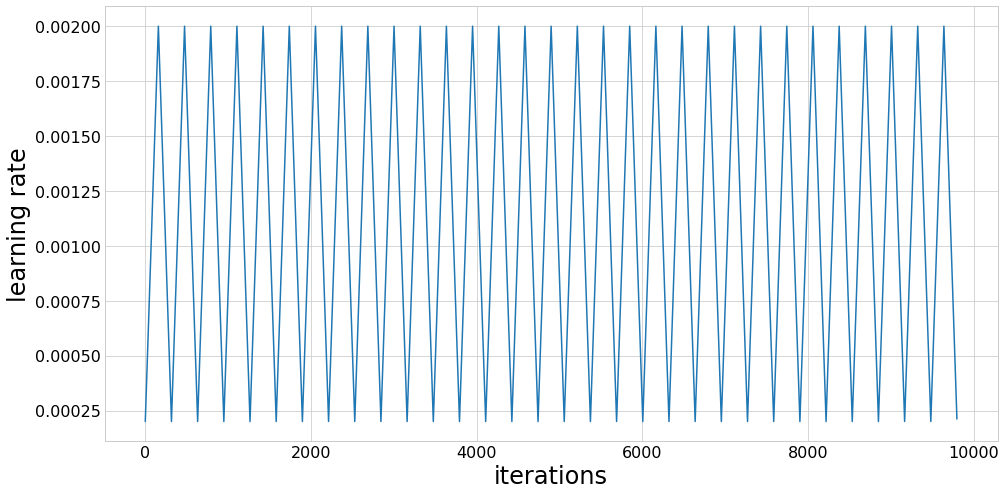

Fold took 113.532s

Training model 5 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144801). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8946637645130974e-05
2 New best found: 3.5849014320410785e-05
3 New best found: 3.387946600560099e-05
Saving snapshot 1
4 New best found: 3.326653316617012e-05
7 New best found: 3.261429304693593e-05
Saving snapshot 2
8 New best found: 3.242251695628511e-05
Saving snapshot 3
12 New best found: 3.2043511515075805e-05
Saving snapshot 4
16 New best found: 3.195175851869862e-05
17 New best found: 3.1942873368097935e-05
Saving snapshot 5
23 New best found: 3.1917256214364896e-05
Saving snapshot 6
24 New best found: 3.179857425420778e-05
Saving snapshot 7
28 New best found: 3.1763498901273125e-05
29 New best found: 3.170017823431408e-05
Saving snapshot 8
32 New best found: 3.16357361341943e-05
33 New best found: 3.1611099728615956e-05
Saving snapshot 9
36 New best found: 3.155575482232962e-05
37 New best found: 3.1486182102526075e-05
Saving snapshot 10
40 New best found: 3.143740487139439e-05
Saving snapshot 11
44 New best found: 3.143041457369691e-05
Saving snapshot 12
S

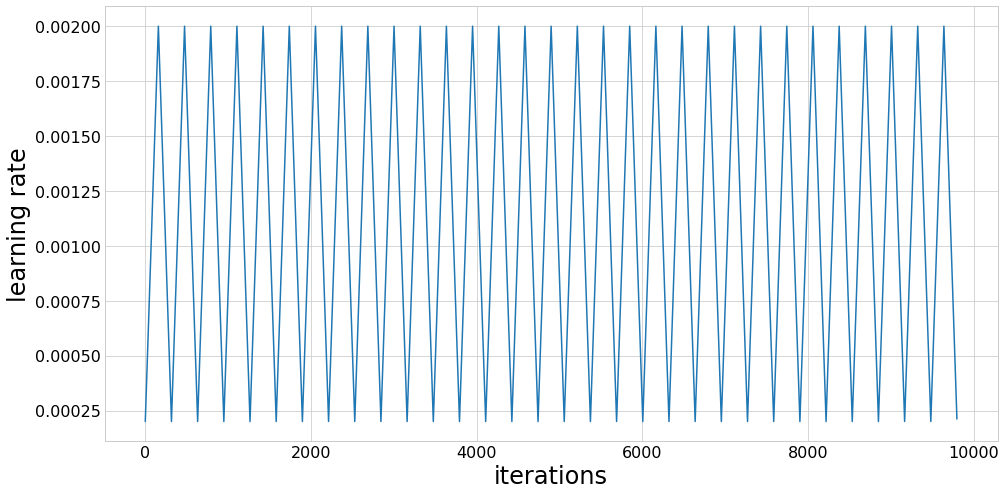

Fold took 116.398s

Training model 6 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153707). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8703144064814716e-05
2 New best found: 3.631225798092688e-05
3 New best found: 3.5349110238769796e-05
Saving snapshot 1
4 New best found: 3.448390039138979e-05
7 New best found: 3.394557774538759e-05
Saving snapshot 2
8 New best found: 3.3522696564538493e-05
Saving snapshot 3
13 New best found: 3.346626844603203e-05
15 New best found: 3.345316104925771e-05
Saving snapshot 4
16 New best found: 3.307414743436844e-05
Saving snapshot 5
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.306369907065412e-05
Saving snapshot 8
32 New best found: 3.294546798537647e-05
Saving snapshot 9
36 New best found: 3.293125828798089e-05
Saving snapshot 10
40 New best found: 3.2810248158359156e-05
Saving snapshot 11
44 New best found: 3.280748862547526e-05
Saving snapshot 12
48 New best found: 3.2748631392086766e-05
Saving snapshot 13
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving snapshot 17
68 New best found: 3.2722968044806265e-05
Saving snapshot 18
Saving snap

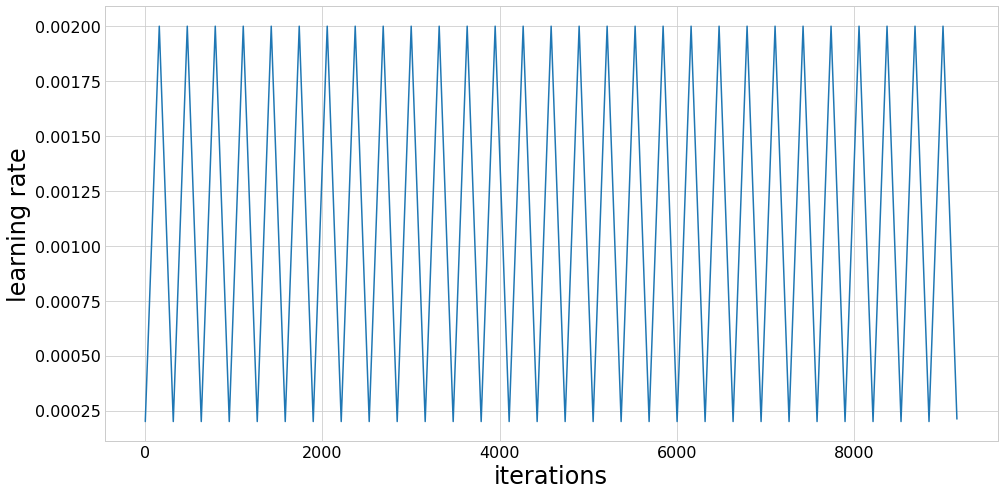

Fold took 114.402s

Training model 7 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174348). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7985039860359394e-05
2 New best found: 3.63457488201675e-05
3 New best found: 3.4110895363846796e-05
Saving snapshot 1
4 New best found: 3.316032959410222e-05
7 New best found: 3.277657055441523e-05
Saving snapshot 2
8 New best found: 3.2463899787398985e-05
11 New best found: 3.24445661099162e-05
Saving snapshot 3
12 New best found: 3.21911526072654e-05
Saving snapshot 4
16 New best found: 3.198105757473968e-05
Saving snapshot 5
20 New best found: 3.186210097919684e-05
Saving snapshot 6
24 New best found: 3.171034076221986e-05
Saving snapshot 7
Saving snapshot 8
Saving snapshot 9
36 New best found: 3.167600516899256e-05
Saving snapshot 10
Saving snapshot 11
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
56 New best found: 3.163967560394667e-05
Saving snapshot 15
60 New best found: 3.159633626928553e-05
Saving snapshot 16
Saving snapshot 17
Saving snapshot 18
Saving snapshot 19
Saving snapshot 20
Saving snapshot 21
Saving snapshot 22
Saving snapshot 23
Savi

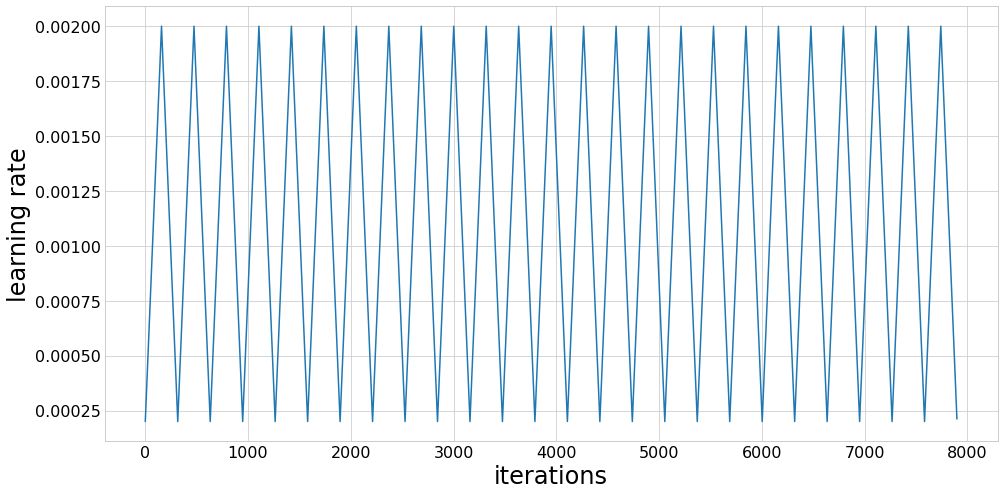

Fold took 100.626s

Training model 8 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183824). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8310818398895206e-05
2 New best found: 3.508569318582886e-05
3 New best found: 3.3529316380008824e-05
Saving snapshot 1
4 New best found: 3.2946951883786826e-05
6 New best found: 3.293864394363481e-05
7 New best found: 3.265943059232086e-05
Saving snapshot 2
8 New best found: 3.2210141399991696e-05
Saving snapshot 3
12 New best found: 3.1983467593090606e-05
Saving snapshot 4
19 New best found: 3.174726659053704e-05
Saving snapshot 5
20 New best found: 3.1644085117295615e-05
Saving snapshot 6
24 New best found: 3.149234594675363e-05
Saving snapshot 7
28 New best found: 3.141991716765915e-05
Saving snapshot 8
33 New best found: 3.14092083950527e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.134416978500667e-05
Saving snapshot 11
Saving snapshot 12
49 New best found: 3.1213338610541544e-05
Saving snapshot 13
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving snapshot 17
68 New best found: 3.11917825762066e-05
Saving snapshot 18
Saving snapsh

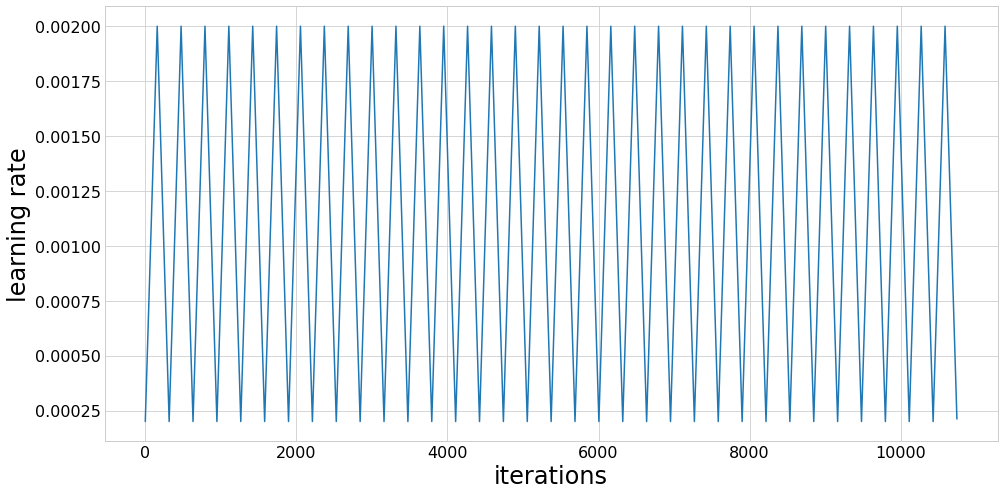

Fold took 138.639s

Training model 9 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188643). Check your callbacks.
  % delta_t_median)


1 New best found: 3.784700731339399e-05
2 New best found: 3.620930399629287e-05
3 New best found: 3.405979149247287e-05
Saving snapshot 1
4 New best found: 3.3523669837450146e-05
7 New best found: 3.3403509152412883e-05
Saving snapshot 2
8 New best found: 3.271382225648267e-05
Saving snapshot 3
13 New best found: 3.2677944721945095e-05
14 New best found: 3.262464976578485e-05
Saving snapshot 4
16 New best found: 3.233729696803493e-05
17 New best found: 3.2174889904854356e-05
Saving snapshot 5
20 New best found: 3.2155035620962736e-05
Saving snapshot 6
Saving snapshot 7
Saving snapshot 8
32 New best found: 3.2008523297554346e-05
Saving snapshot 9
Saving snapshot 10
Saving snapshot 11
44 New best found: 3.193180428352207e-05
Saving snapshot 12
Saving snapshot 13
53 New best found: 3.183995310682803e-05
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving snapshot 17
Saving snapshot 18
Saving snapshot 19
Saving snapshot 20
Saving snapshot 21
Saving snapshot 22
Saving snapshot 2

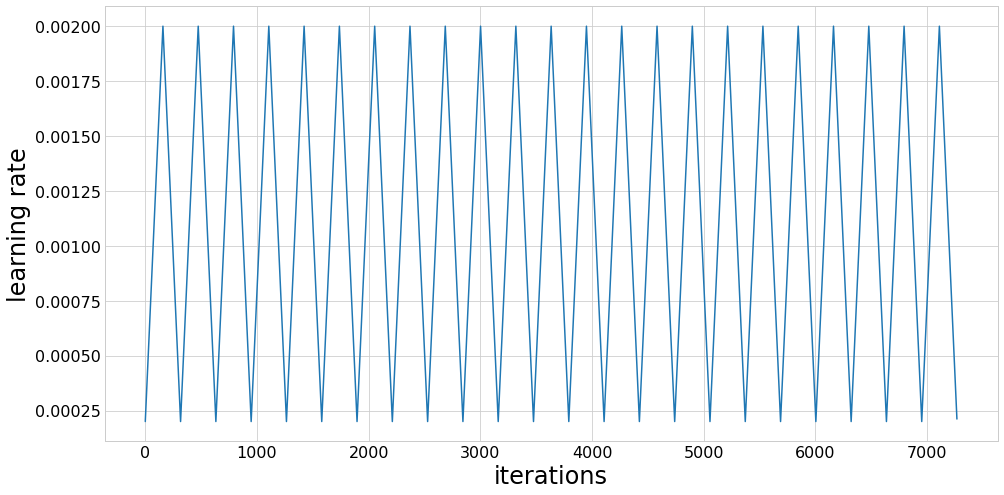

Fold took 97.051s

Training model 10 / 10
Using linear LR cycle


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202229). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8675309437459615e-05
2 New best found: 3.53759871715392e-05
3 New best found: 3.414703525642465e-05
Saving snapshot 1
4 New best found: 3.385333229964555e-05
Saving snapshot 2
8 New best found: 3.315949532983206e-05
Saving snapshot 3
12 New best found: 3.3048465746122387e-05
13 New best found: 3.300159900754097e-05
Saving snapshot 4
16 New best found: 3.29257229452756e-05
17 New best found: 3.2837923207280186e-05
Saving snapshot 5
20 New best found: 3.275110217753839e-05
21 New best found: 3.272858839834519e-05
Saving snapshot 6
24 New best found: 3.259388017014505e-05
Saving snapshot 7
28 New best found: 3.24750284899636e-05
Saving snapshot 8
32 New best found: 3.2469715413465004e-05
33 New best found: 3.24497804363504e-05
Saving snapshot 9
36 New best found: 3.2439183156342366e-05
Saving snapshot 10
40 New best found: 3.229424158244593e-05
Saving snapshot 11
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
56 New best found: 3.227709959957431e-05
Saving sn

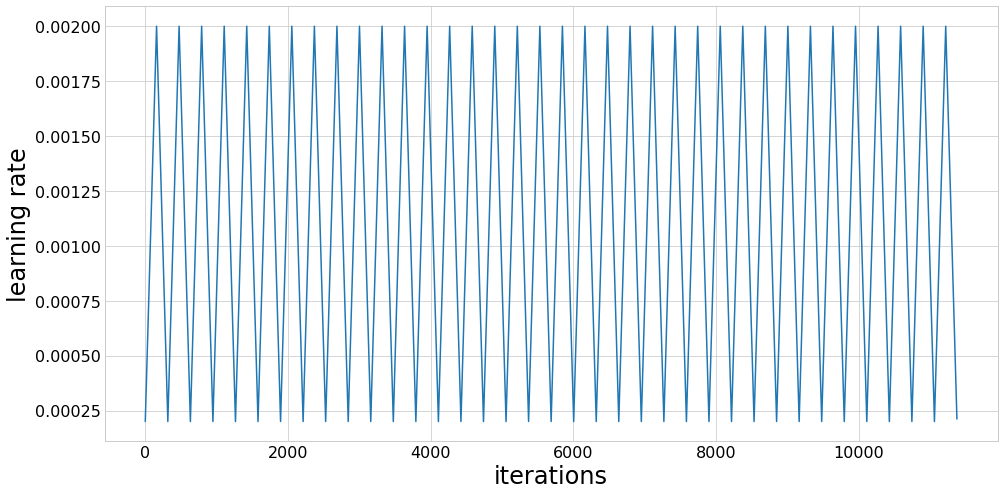

Fold took 153.734s


______________________________________
Training finished
Cross-validation took 1107.112s 


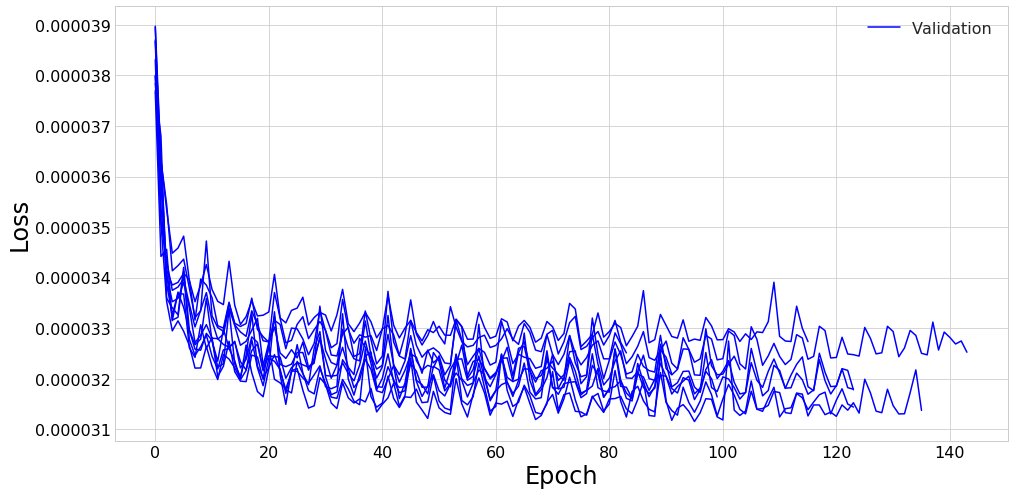

Mean loss = 3.18e-05 +- 1e-07
Mean wAUC = 0.0634 +- 0.0006
Mean AUC = 0.0999 +- 0.0009
Mean AMS = 3.79 +- 0.07
Mean cut = 0.953 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [8]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [ ]:
ensemble, weights = assemble_ensemble(results, 10, cycle_losses=None, n_cycles=None, load_cycles_only=False)

In [12]:
def test_ensemble(size, n_cycles):
    ensemble, weights = assemble_ensemble(results, size, cycle_losses=cycle_losses, n_cycles=n_cycles, load_cycles_only=True, patience=patience, weighting='uniform')
    val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))
    fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=0)
    val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')
    ams, cut = ams_scan_slow(val_df_tta, br=10, w_factor=250000/50000)
    print(size, n_cycles, ams, cut)

In [13]:
%%capture --no-stdout
size = 10
for n_cycles in [0,1,2,3]:
    print('__________________________________')
    test_ensemble(size, n_cycles)
    print('__________________________________\n')

__________________________________
Choosing ensemble by loss
Model 0 is 7 with loss = 3.1153037933836456e-05
Model 1 is 4 with loss = 3.124154375109356e-05
Model 2 is 2 with loss = 3.156020650094537e-05
Model 3 is 6 with loss = 3.159633626928553e-05
Model 4 is 3 with loss = 3.1611135953087234e-05
Model 5 is 8 with loss = 3.183995310682803e-05
Model 6 is 0 with loss = 3.195960917010317e-05
Model 7 is 9 with loss = 3.219299685862911e-05
Model 8 is 1 with loss = 3.2458384704505014e-05
Model 9 is 5 with loss = 3.263275882205693e-05
50000 candidates loaded
10 0 3.9145082364005077 0.9667968
__________________________________

__________________________________
Choosing ensemble by loss
Model 0 cycle 25 has loss = 3.124458893871633e-05 and weight 1
Model 1 cycle 22 has loss = 3.1395444546069484e-05 and weight 1
Model 2 cycle 22 has loss = 3.176863822096141e-05 and weight 1
Model 3 cycle 16 has loss = 3.170896481751697e-05 and weight 1
Model 4 cycle 22 has loss = 3.164582148345706e-05 and weig

## Response on validation data without TTA

In [ ]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df = convert_to_df(val_fy.source)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

In [ ]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [ ]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=2)

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

In [ ]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde)

In [ ]:
score_test_data(test_fy.source, cut_mean)

# Test scoring - With TTA

In [ ]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), rot_mult=3, random_rot=True)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

In [ ]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)